In [ ]:
.#IMPORTAMOS PAQUETERIAS NECESARIAS 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
import seaborn as sns
import psycopg2 as pg
import statsmodels.api as sm
import pylab as py

# Dataframe y variables dummies

In [ ]:
#CREAMOS EL DATAFRAME
exams = pd.read_csv("ABT.csv")
exams

,gender,ethnicity,parent_level,lunch,test_preparation,math_score,reading_score,writing_score,avg_score,target
0,female,group D,some college,standard,completed,59,70,78,69.00,0
1,male,group D,associate's degree,standard,none,96,93,87,92.00,1
2,female,group D,some college,free/reduced,none,57,76,77,70.00,0
3,male,group B,some college,free/reduced,none,70,70,63,67.67,0
4,female,group D,associate's degree,standard,none,83,85,86,84.67,1
...,...,...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71,75.00,1
996,male,group C,some college,standard,none,80,66,66,70.67,0
997,female,group A,high school,standard,completed,67,86,86,79.67,1
998,male,group E,high school,standard,none,80,72,62,71.33,0


In [ ]:
#CREAMOS VARIABLES DUMMIES PARA CADA UNA DE LAS VARIABLES CATEGORICAS QUE TENEMOS EN LA TABLA
exams_Dummies = pd.get_dummies(exams)
exams_Dummies

,math_score,reading_score,writing_score,avg_score,target,gender_female,gender_male,ethnicity_group A,ethnicity_group B,ethnicity_group C,...,parent_level_associate's degree,parent_level_bachelor's degree,parent_level_high school,parent_level_master's degree,parent_level_some college,parent_level_some high school,lunch_free/reduced,lunch_standard,test_preparation_completed,test_preparation_none
0,59,70,78,69.00,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
1,96,93,87,92.00,1,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,1
2,57,76,77,70.00,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
3,70,70,63,67.67,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,1
4,83,85,86,84.67,1,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,77,77,71,75.00,1,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,1
996,80,66,66,70.67,0,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,1
997,67,86,86,79.67,1,1,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
998,80,72,62,71.33,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1


In [ ]:
#DESCARGAMOS LA TABLA MODIFICADA
exams_Dummies.to_csv('ExamsDummies.csv', index= False)

In [ ]:
#cuantil
a = 0.65
corte = np.quantile(exams["avg_score"], a)
print("Cuantil ",  str(a),  ": ", corte)

Cuantil  0.65 :  74.67


#Histogramas

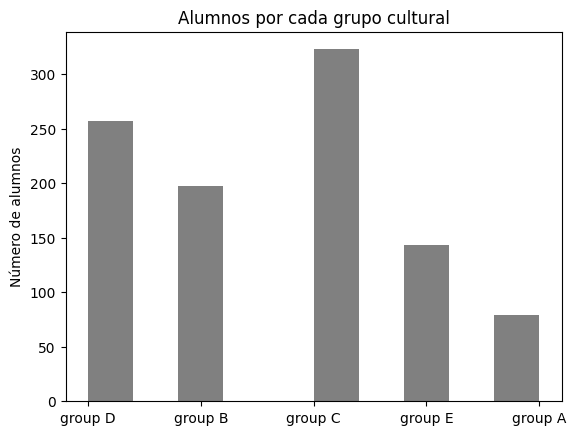

In [ ]:
# Creating histograma de la distribucion por razas
fig, ax = plt.subplots(1, 1)
ax.hist(exams["ethnicity"], color= 'grey')
  
# Set title
ax.set_title("Alumnos por cada grupo cultural")
  
# adding labels
ax.set_ylabel('Número de alumnos')
  
# Show plot
plt.show()

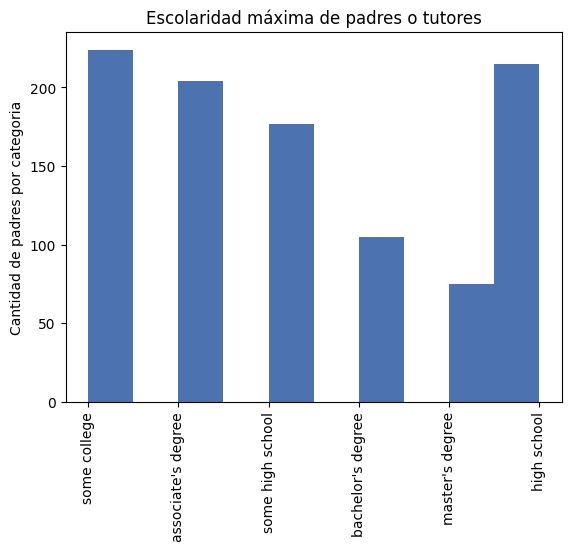

In [ ]:
# Creating histograma de la escolaridad de padre y tutores
fig, ax = plt.subplots(1, 1)
ax.hist(exams["parent_level"])
  
# Set title
ax.set_title("Escolaridad máxima de padres o tutores")
  
# adding labels
ax.set_ylabel('Cantidad de padres por categoria')
plt.xticks(rotation='vertical')
# Show plot
plt.show()

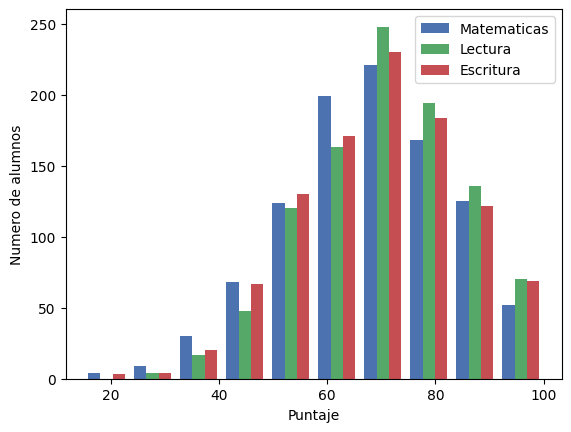

In [ ]:
#histograma de calificacion de las 3 evaluaciones
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1.hist([exams["math_score"], exams["reading_score"], exams["writing_score"]], label=["Matematicas", "Lectura", "Escritura"])
ax1.set_xlabel("Puntaje")
ax1.set_ylabel("Numero de alumnos")
ax1.legend(loc = "upper right")
plt.show()

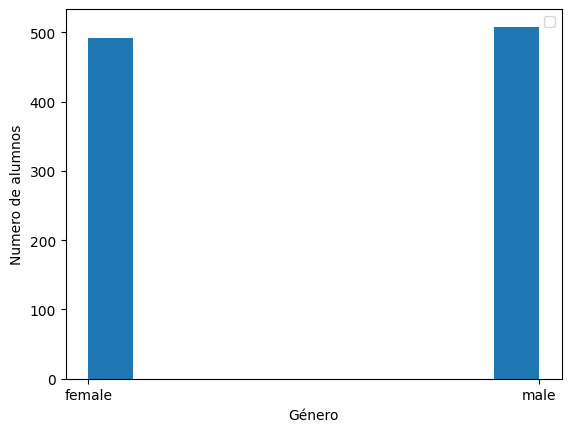

In [ ]:
#histograma de calificacion de las 3 evaluaciones
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1.hist(exams["gender"])
ax1.set_xlabel("Género")
ax1.set_ylabel("Numero de alumnos")
ax1.legend(loc = "upper right")
plt.show()

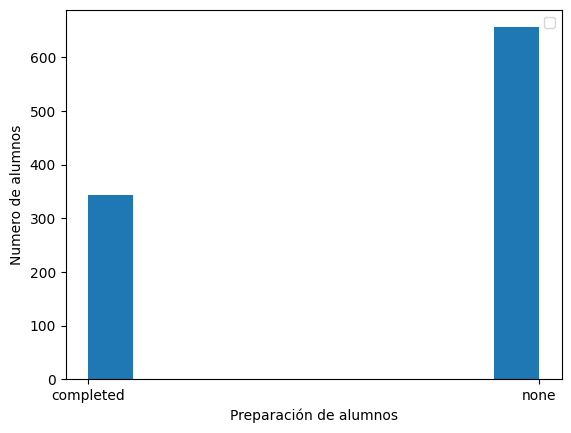

In [ ]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1.hist(exams['test_preparation'])
ax1.set_xlabel("Preparación de alumnos")
ax1.set_ylabel("Numero de alumnos")
ax1.legend(loc = "upper right")
plt.show()

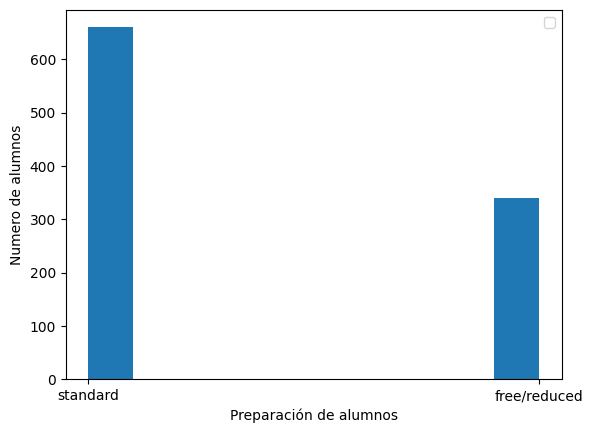

In [ ]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1.hist(exams['lunch'])
ax1.set_xlabel("Preparación de alumnos")
ax1.set_ylabel("Numero de alumnos")
ax1.legend(loc = "upper right")
plt.show()

# ANÁLISIS DE CORRELACIÓN

In [ ]:
print("Mediana de calif. de matematicas:", np.median(exams["math_score"]))
print("Mediana de calif. de lectura:", np.median(exams["reading_score"]))
print("Mediana de calif. de escritura:", np.median(exams["writing_score"]))

Mediana de calif. de matematicas: 68.0
Mediana de calif. de lectura: 70.5
Mediana de calif. de escritura: 70.0


<Axes: xlabel='math_score', ylabel='writing_score'>

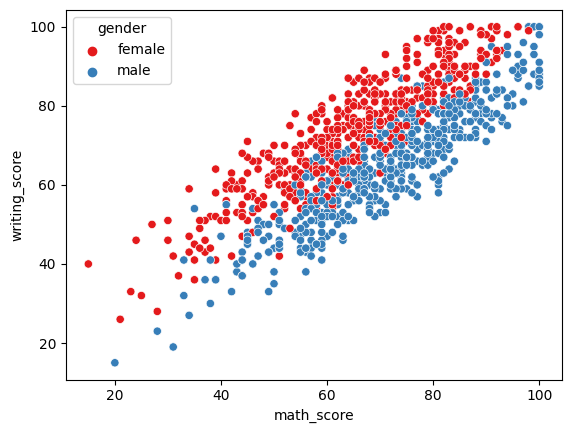

In [ ]:
##GRAFICAS DE DISPERSIÓN
sns.scatterplot(exams, x = "math_score", y = "writing_score", palette = "Set1", hue = "gender")

<Axes: xlabel='reading_score', ylabel='writing_score'>

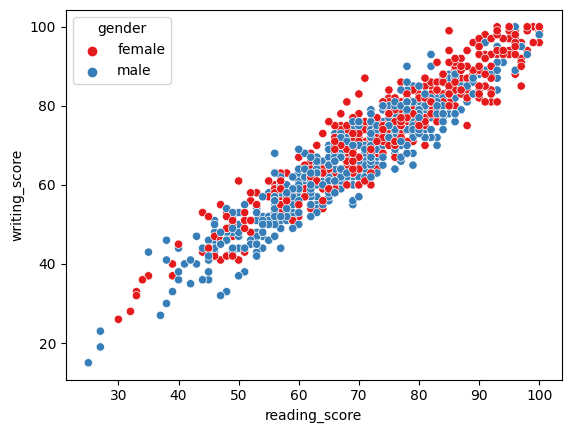

In [ ]:
sns.scatterplot(exams, x = "reading_score", y = "writing_score", palette = "Set1", hue = "gender")

<Axes: xlabel='math_score', ylabel='reading_score'>

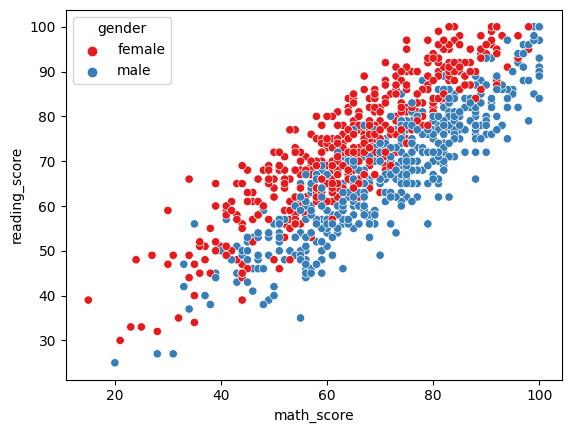

In [ ]:
sns.scatterplot(exams, x = "math_score", y = "reading_score", palette = "Set1", hue = "gender")

<Axes: xlabel='math_score', ylabel='writing_score'>

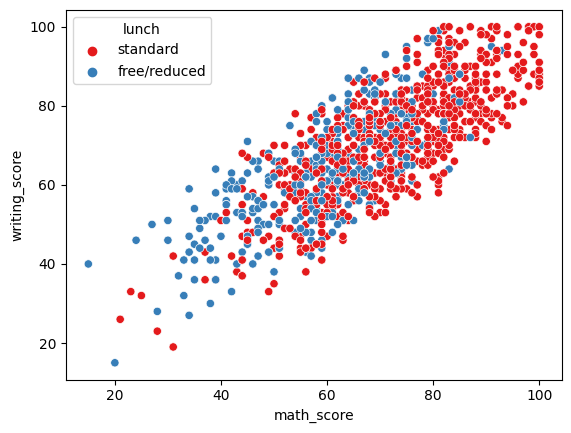

In [ ]:
sns.scatterplot(exams, x = "math_score", y = "writing_score", palette = "Set1", hue = "lunch")

<Axes: xlabel='reading_score', ylabel='writing_score'>

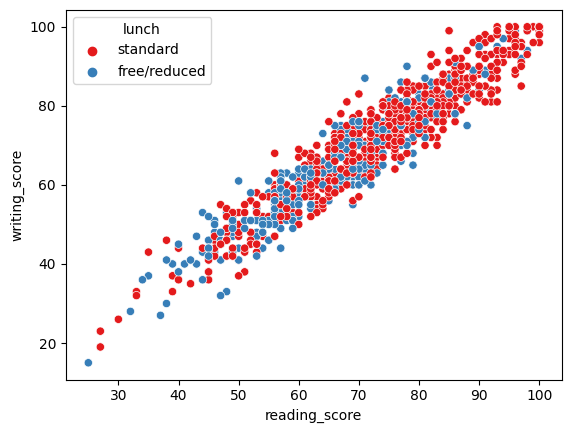

In [ ]:
sns.scatterplot(exams, x = "reading_score", y = "writing_score", palette = "Set1", hue = "lunch")

<Axes: xlabel='math_score', ylabel='reading_score'>

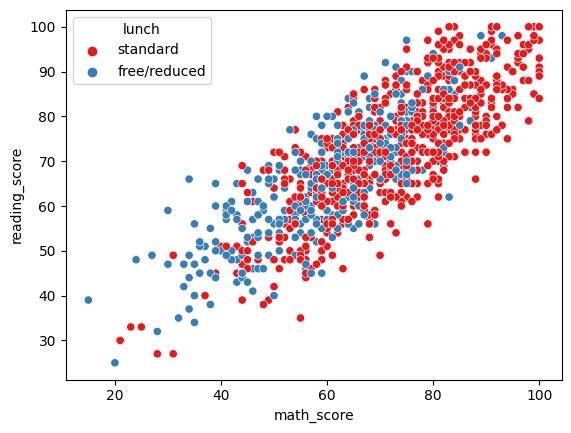

In [ ]:
sns.scatterplot(exams, x = "math_score", y = "reading_score", palette = "Set1", hue = "lunch")

<Axes: xlabel='avg_score', ylabel='ethnicity'>

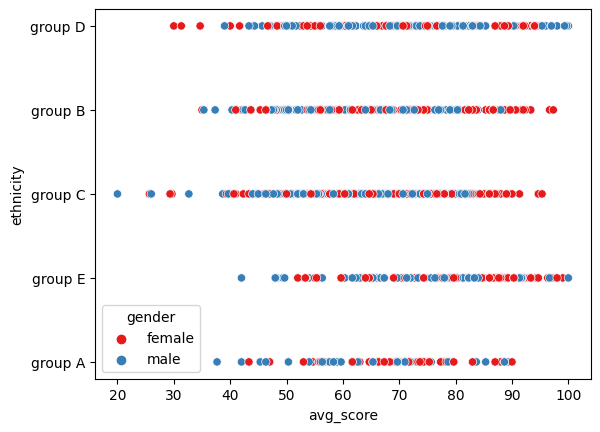

In [ ]:
sns.scatterplot(exams, x = "avg_score", y = "ethnicity", palette = "Set1", hue = "gender")

<Axes: >

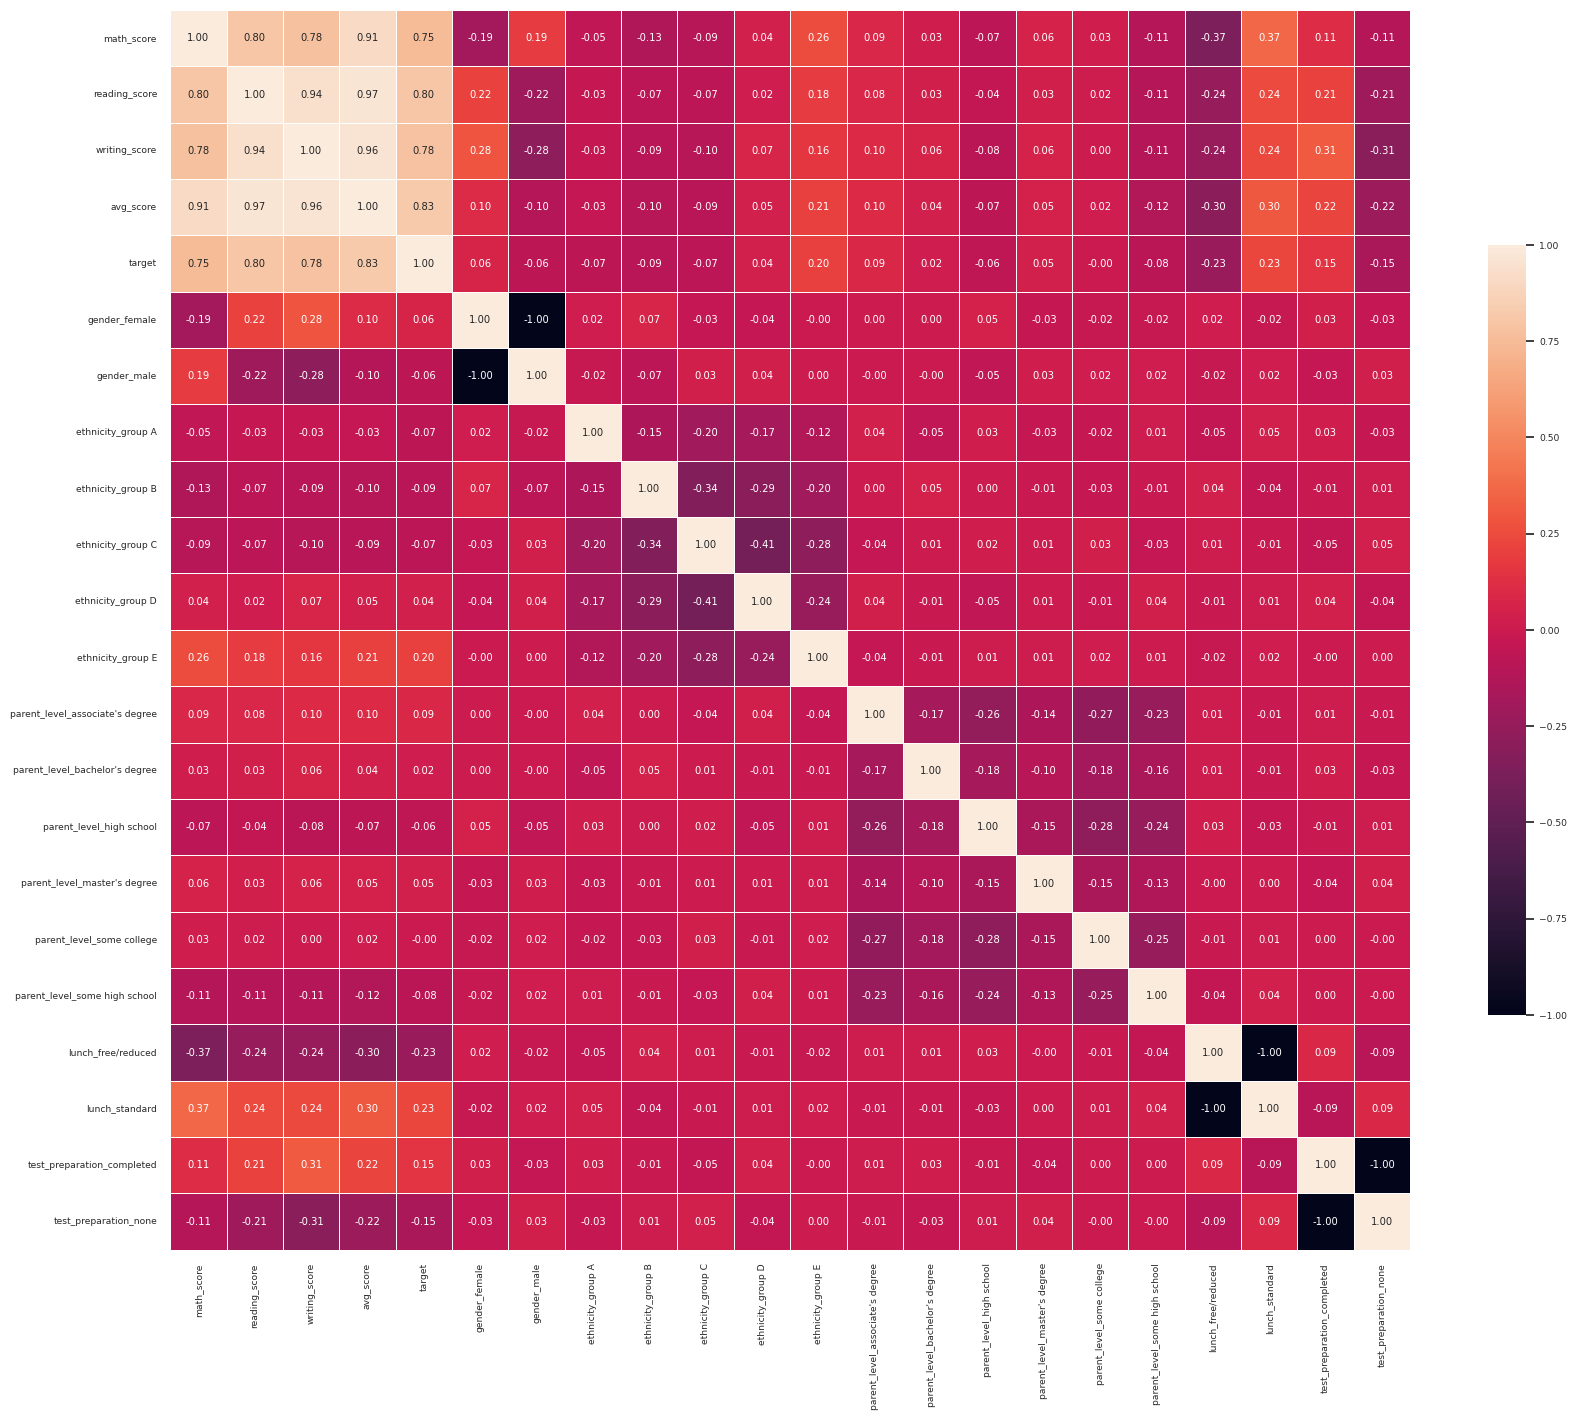

In [ ]:
#MATRIZ DE CORRELACIÓN
corr = exams_Dummies.corr("spearman")
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<ipython-input-33-4309b75eb26c>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


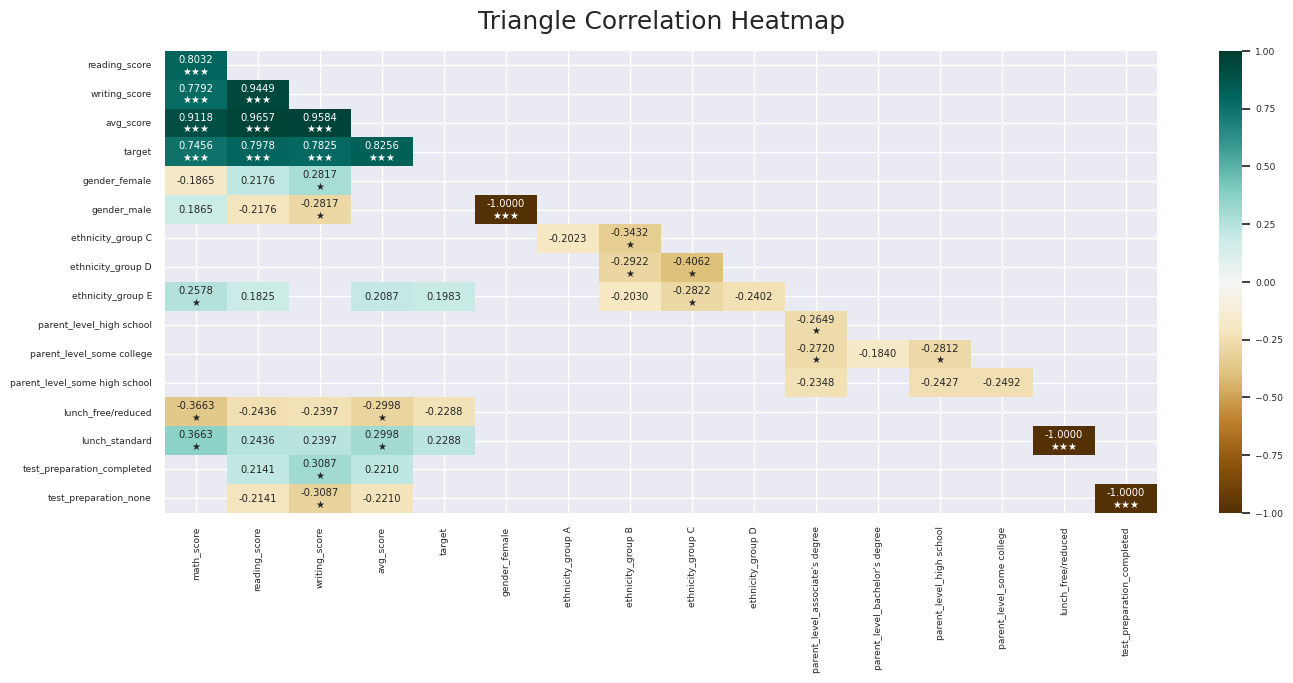

In [ ]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cut_off = 0.18  # only show cells with abs(correlation) at least this value
extreme_1 = 0.25  # show with a star
extreme_2 = 0.5  # show with a second star
extreme_3 = 0.7  # show with a third star
mask |= np.abs(corr) < cut_off
corr = corr[~mask]  # fill in NaN in the non-desired cells

remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corr = corr.iloc[wanted_cols, wanted_rows]

annot = [[f"{val:.4f}"
          + ('' if abs(val) < extreme_1 else '\n★')  # add one star if abs(val) >= extreme_1
          + ('' if abs(val) < extreme_2 else '★')  # add an extra star if abs(val) >= extreme_2
          + ('' if abs(val) < extreme_3 else '★')  # add yet an extra star if abs(val) >= extreme_3
          for val in row] for row in corr.to_numpy()]
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=annot, fmt='', cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 18}, pad=16)
plt.show()

#DISTRIBUCIONES NUMERICAS

## Math_score

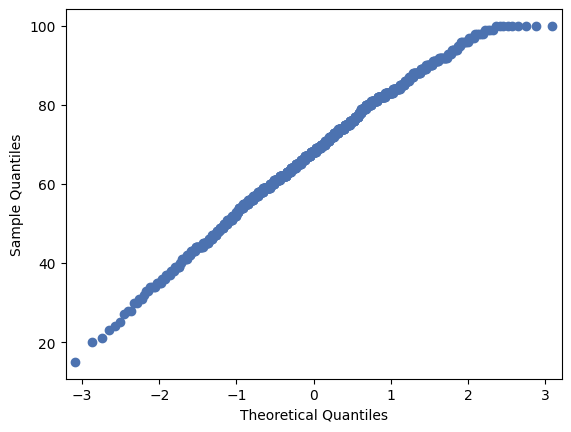

In [ ]:
#ANALISIS DE MATH_SCORE
sm.qqplot(exams["math_score"])
py.show()

El p-values es:  0.10742568680454467 
 No rechazamos al nivel a = 0.05 que la muestra tenga una distribución normal



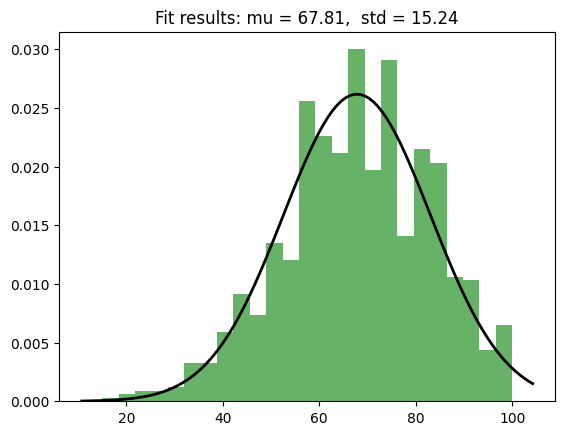

In [ ]:

# Generate some data for this demonstration.
data = exams["math_score"]
# Fit a normal distribution to the data:
mu = np.mean(exams["math_score"])
std = np.std(exams["math_score"])

print("El p-values es: ",sc.kstest(data, lambda x: sc.expon.cdf(x, loc=mu, scale=std)).pvalue, "\n","No rechazamos al nivel a = 0.05 que la muestra tenga una distribución normal\n")

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = sc.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

##Reading_score

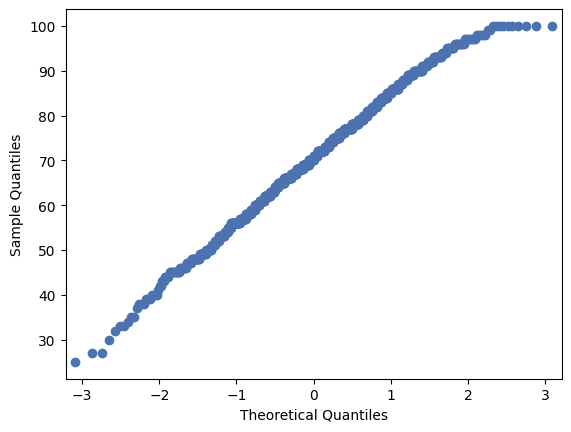

In [ ]:
#ANALISIS DE reading_SCORE
sm.qqplot(exams["reading_score"])
py.show()

El p-values es:  0.3899607084451515 
 No rechazamos al nivel a = 0.05 que la muestra tenga una distribución normal


Con parámetros:  70.382 , 14.10035730043746 



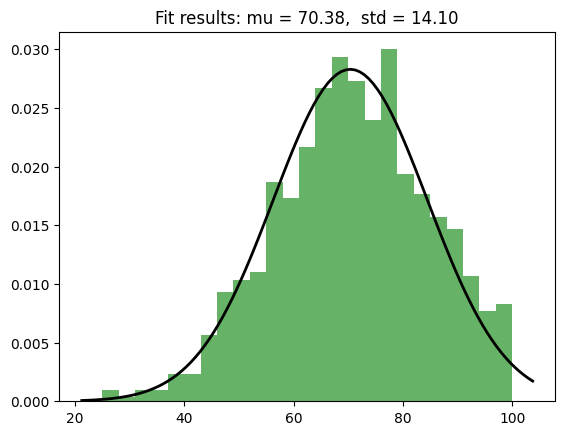

In [ ]:
# Generate some data for this demonstration.
data = exams["reading_score"]
# Fit a normal distribution to the data:
mu = np.mean(exams["reading_score"])
std = np.std(exams["reading_score"])

print("El p-values es: ",sc.kstest(data, lambda x: sc.norm.cdf(x, loc=mu, scale=std)).pvalue, "\n","No rechazamos al nivel a = 0.05 que la muestra tenga una distribución normal\n")
print("\nCon parámetros: ", mu ,",", std, "\n")

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = sc.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

##Writing_score

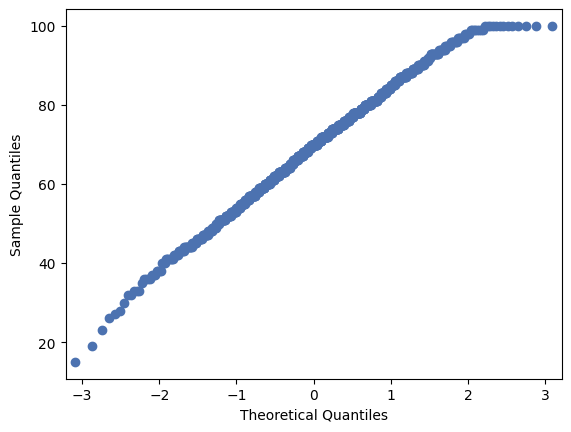

In [ ]:
sm.qqplot(exams["writing_score"])
py.show()

El p-values es:  0.14968569427506562 
 No rechazamos al nivel a = 0.05 que la muestra tenga una distribución normal


Con parámetros:  69.14 , 15.018402045490726 



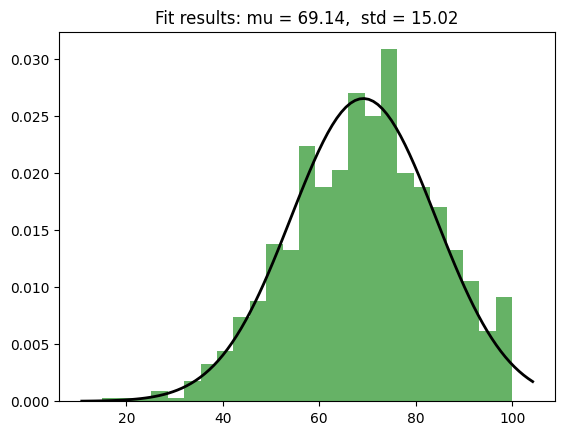

In [ ]:
# Generate some data for this demonstration.
data = exams["writing_score"]
# Fit a normal distribution to the data:
mu = np.mean(exams["writing_score"])
std = np.std(exams["writing_score"])

print("El p-values es: ",sc.kstest(data, lambda x: sc.norm.cdf(x, loc=mu, scale=std)).pvalue, "\n","No rechazamos al nivel a = 0.05 que la muestra tenga una distribución normal\n")
print("\nCon parámetros: ", mu ,",", std, "\n")

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = sc.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

##Average_score

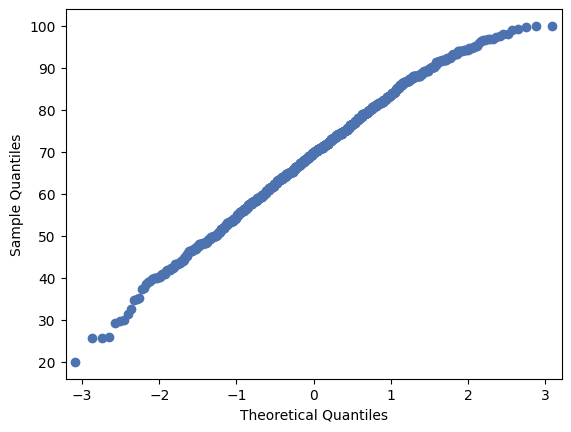

In [ ]:
sm.qqplot(exams["avg_score"])
py.show()

El p-values es:  0.4681913856282631 
 No rechazamos al nivel a = 0.05 que la muestra tenga una distribución normal


Con parámetros:  69.11053 , 14.020783431003418 



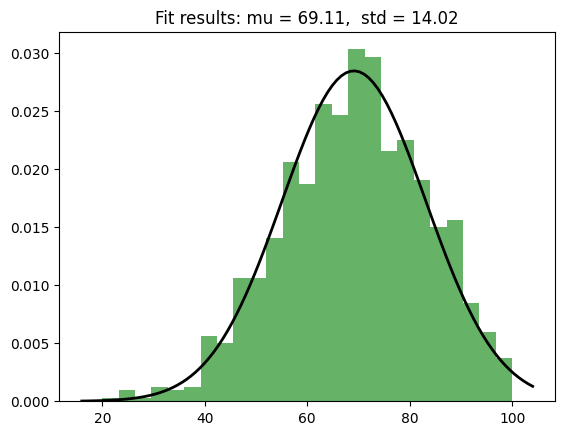

In [ ]:
# Generate some data for this demonstration.
data = exams["avg_score"]
# Fit a normal distribution to the data:
mu = np.mean(exams["avg_score"])
std = np.std(exams["avg_score"])

print("El p-values es: ",sc.kstest(data, lambda x: sc.norm.cdf(x, loc=mu, scale=std)).pvalue, "\n","No rechazamos al nivel a = 0.05 que la muestra tenga una distribución normal\n")
print("\nCon parámetros: ", mu ,",", std, "\n")

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = sc.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

En general, las 4 variables numericas de nuestra tabla ABT se distribuyen de manera normal, con parámetros bastante similares, por lo que para la modelación podemos estandarizar sin problema para obtener una distribución $N(0,1)$

#Independencia o dependencia entre variables categóricas

In [ ]:
#exams["gender", "ethnicity", "parent_level"	, "lunch",	"test_preparation"]
obs = pd.crosstab(exams["gender"], exams['ethnicity'])
print("Independencia entre gender y ethnicity; p-value de chi cuadrada:", sc.chi2_contingency(obs).pvalue)
obs = pd.crosstab(exams["gender"], exams['parent_level'])
print("Independencia entre gedner y parent_level; p-value de chi cuadrada:", sc.chi2_contingency(obs).pvalue)
obs = pd.crosstab(exams["gender"], exams['lunch'])
print("Independencia entre gedner y lunch; p-value de chi cuadrada:", sc.chi2_contingency(obs).pvalue)
obs = pd.crosstab(exams["gender"], exams['test_preparation'])
print("Independencia entre gedner y test_preparation; p-value de chi cuadrada:", sc.chi2_contingency(obs).pvalue)
obs = pd.crosstab(exams["ethnicity"], exams['parent_level'])
print("Independencia entre ethnicity y parent_level; p-value de chi cuadrada:", sc.chi2_contingency(obs).pvalue)
obs = pd.crosstab(exams["ethnicity"], exams['lunch'])
print("Independencia entre ethnicity y lunch; p-value de chi cuadrada:", sc.chi2_contingency(obs).pvalue)
obs = pd.crosstab(exams["ethnicity"], exams['test_preparation'])
print("Independencia entre ethnicity y test_preparation; p-value de chi cuadrada:", sc.chi2_contingency(obs).pvalue)
obs = pd.crosstab(exams["parent_level"], exams['lunch'])
print("Independencia entre parent_level y lunch; p-value de chi cuadrada:", sc.chi2_contingency(obs).pvalue)
obs = pd.crosstab(exams["parent_level"], exams['test_preparation'])
print("Independencia entre parent_level y test_preparation; p-value de chi cuadrada:", sc.chi2_contingency(obs).pvalue)
obs = pd.crosstab(exams["lunch"], exams['test_preparation'])
print("Independencia entre lunch y test_preparation; p-value de chi cuadrada:", sc.chi2_contingency(obs).pvalue)

Independencia entre gender y ethnicity; p-value de chi cuadrada: 0.17003586377583801
Independencia entre gedner y parent_level; p-value de chi cuadrada: 0.6540489221024754
Independencia entre gedner y lunch; p-value de chi cuadrada: 0.6672233099321017
Independencia entre gedner y test_preparation; p-value de chi cuadrada: 0.33422769188002893
Independencia entre ethnicity y parent_level; p-value de chi cuadrada: 0.7622289132432811
Independencia entre ethnicity y lunch; p-value de chi cuadrada: 0.44577080916867995
Independencia entre ethnicity y test_preparation; p-value de chi cuadrada: 0.46328886470737096
Independencia entre parent_level y lunch; p-value de chi cuadrada: 0.798734325943698
Independencia entre parent_level y test_preparation; p-value de chi cuadrada: 0.8257234855728782
Independencia entre lunch y test_preparation; p-value de chi cuadrada: 0.0038966539705675147


En general, al nivel de significancia $α = 0.05$, la mayoría de variables categóricas son independientes entre sí; la excepción es lunch y test_preparation, donde se rechaza la hipotesis nula, esto implica que estas dos variables están correlacionadas

In [ ]:
##Correlación entre estas variables y target
obs = pd.crosstab(exams["gender"], exams['target'])
print("Independencia entre gender y target; p-value de chi cuadrada:", sc.chi2_contingency(obs).pvalue)
obs = pd.crosstab(exams["ethnicity"], exams['target'])
print("Independencia entre ethnicity y target; p-value de chi cuadrada:", sc.chi2_contingency(obs).pvalue)
obs = pd.crosstab(exams["parent_level"], exams['target'])
print("Independencia entre parent_level y target; p-value de chi cuadrada:", sc.chi2_contingency(obs).pvalue)
obs = pd.crosstab(exams["lunch"], exams['target'])
print("Independencia entre lunch y target; p-value de chi cuadrada:", sc.chi2_contingency(obs).pvalue)
obs = pd.crosstab(exams["test_preparation"], exams['target'])
print("Independencia entre test_preparation y target; p-value de chi cuadrada:", sc.chi2_contingency(obs).pvalue)


Independencia entre gender y target; p-value de chi cuadrada: 0.04965196027351439
Independencia entre ethnicity y target; p-value de chi cuadrada: 6.261538668615636e-10
Independencia entre parent_level y target; p-value de chi cuadrada: 0.005608804808799182
Independencia entre lunch y target; p-value de chi cuadrada: 7.778929879906714e-13
Independencia entre test_preparation y target; p-value de chi cuadrada: 1.50644903346156e-06


##Point-biserial correlation coefficient

Usado para medir correlación entre variables categóricas binomiales y varianbles continuas
Mediremos la correlación entre genero y los puntajes en cada exámen, al igual que la variable lunch

In [ ]:
#convertimos la columna genero a booleanos, es necesario para el metodo de scipy 
d = {'female': 1, 'male': 0}
bools = exams["gender"].map(d)
print("Correlacion biseriada entre genero y matemáticas: ", sc.pointbiserialr(bools, exams['math_score']).statistic, ", p-value: ", sc.pointbiserialr(bools, exams['math_score']).pvalue)
print("Correlacion biseriada entre genero y lectura: ", sc.pointbiserialr(bools, exams['reading_score']).statistic, ", p-value: ", sc.pointbiserialr(bools, exams['reading_score']).pvalue)
print("Correlacion biseriada entre genero y escritura: ", sc.pointbiserialr(bools, exams['writing_score']).statistic, ", p-value: ", sc.pointbiserialr(bools, exams['writing_score']).pvalue)
print("Correlacion biseriada entre genero y promedio general: ", sc.pointbiserialr(bools, exams['avg_score']).statistic, ", p-value: ", sc.pointbiserialr(bools, exams['avg_score']).pvalue)

Correlacion biseriada entre genero y matemáticas:  -0.19599205862440205 , p-value:  4.0840576091226826e-10
Correlacion biseriada entre genero y lectura:  0.21577477792144348 , p-value:  5.338996106346911e-12
Correlacion biseriada entre genero y escritura:  0.28170650658369173 , p-value:  1.0684129690024223e-19
Correlacion biseriada entre genero y promedio general:  0.10188455922630654 , p-value:  0.0012542740558145837


In [ ]:
#convertimos la columna lunch a booleanos
d = {'standard': 0, 'free/reduced': 1}
bools = exams["lunch"].map(d)
print("Correlacion biseriada entre lunch y matemáticas: ", sc.pointbiserialr(bools, exams['math_score']).statistic, ", p-value: ", sc.pointbiserialr(bools, exams['math_score']).pvalue)
print("Correlacion biseriada entre lunch y lectura: ", sc.pointbiserialr(bools, exams['reading_score']).statistic, ", p-value: ", sc.pointbiserialr(bools, exams['reading_score']).pvalue)
print("Correlacion biseriada entre lunch y escritura: ", sc.pointbiserialr(bools, exams['writing_score']).statistic, ", p-value: ", sc.pointbiserialr(bools, exams['writing_score']).pvalue)
print("Correlacion biseriada entre lunch y promedio general: ", sc.pointbiserialr(bools, exams['avg_score']).statistic, ", p-value: ", sc.pointbiserialr(bools, exams['avg_score']).pvalue)

Correlacion biseriada entre lunch y matemáticas:  -0.3724652956235053 , p-value:  2.90365789323858e-34
Correlacion biseriada entre lunch y lectura:  -0.24131880309991277 , p-value:  1.0239982004044568e-14
Correlacion biseriada entre lunch y escritura:  -0.23439952856197363 , p-value:  6.006854817561014e-14
Correlacion biseriada entre lunch y promedio general:  -0.2995663462710001 , p-value:  3.507833378998243e-22


In [ ]:
d = {'none': 0, 'completed': 1}
bools = exams["test_preparation"].map(d)
print("Correlacion biseriada entre test_preparation y matemáticas: ", sc.pointbiserialr(bools, exams['math_score']).statistic, ", p-value: ", sc.pointbiserialr(bools, exams['math_score']).pvalue)
print("Correlacion biseriada entre test_preparation y lectura: ", sc.pointbiserialr(bools, exams['reading_score']).statistic, ", p-value: ", sc.pointbiserialr(bools, exams['reading_score']).pvalue)
print("Correlacion biseriada entre test_preparation y escritura: ", sc.pointbiserialr(bools, exams['writing_score']).statistic, ", p-value: ", sc.pointbiserialr(bools, exams['writing_score']).pvalue)
print("Correlacion biseriada entre test_preparation y promedio general: ", sc.pointbiserialr(bools, exams['avg_score']).statistic, ", p-value: ", sc.pointbiserialr(bools, exams['avg_score']).pvalue)

Correlacion biseriada entre test_preparation y matemáticas:  0.11992521574134037 , p-value:  0.0001439087706865961
Correlacion biseriada entre test_preparation y lectura:  0.22313176182727285 , p-value:  9.511787328600692e-13
Correlacion biseriada entre test_preparation y escritura:  0.3215201934090676 , p-value:  1.7543790753999023e-25
Correlacion biseriada entre test_preparation y promedio general:  0.2330635643585587 , p-value:  8.398599673447736e-14


Ambas variables categóricas están correlacionadas con los puntajes de cada exámen y con el promedio general de cada alumno 

<ipython-input-4-162f91b36d86>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = exams.corr("spearman")


<Axes: >

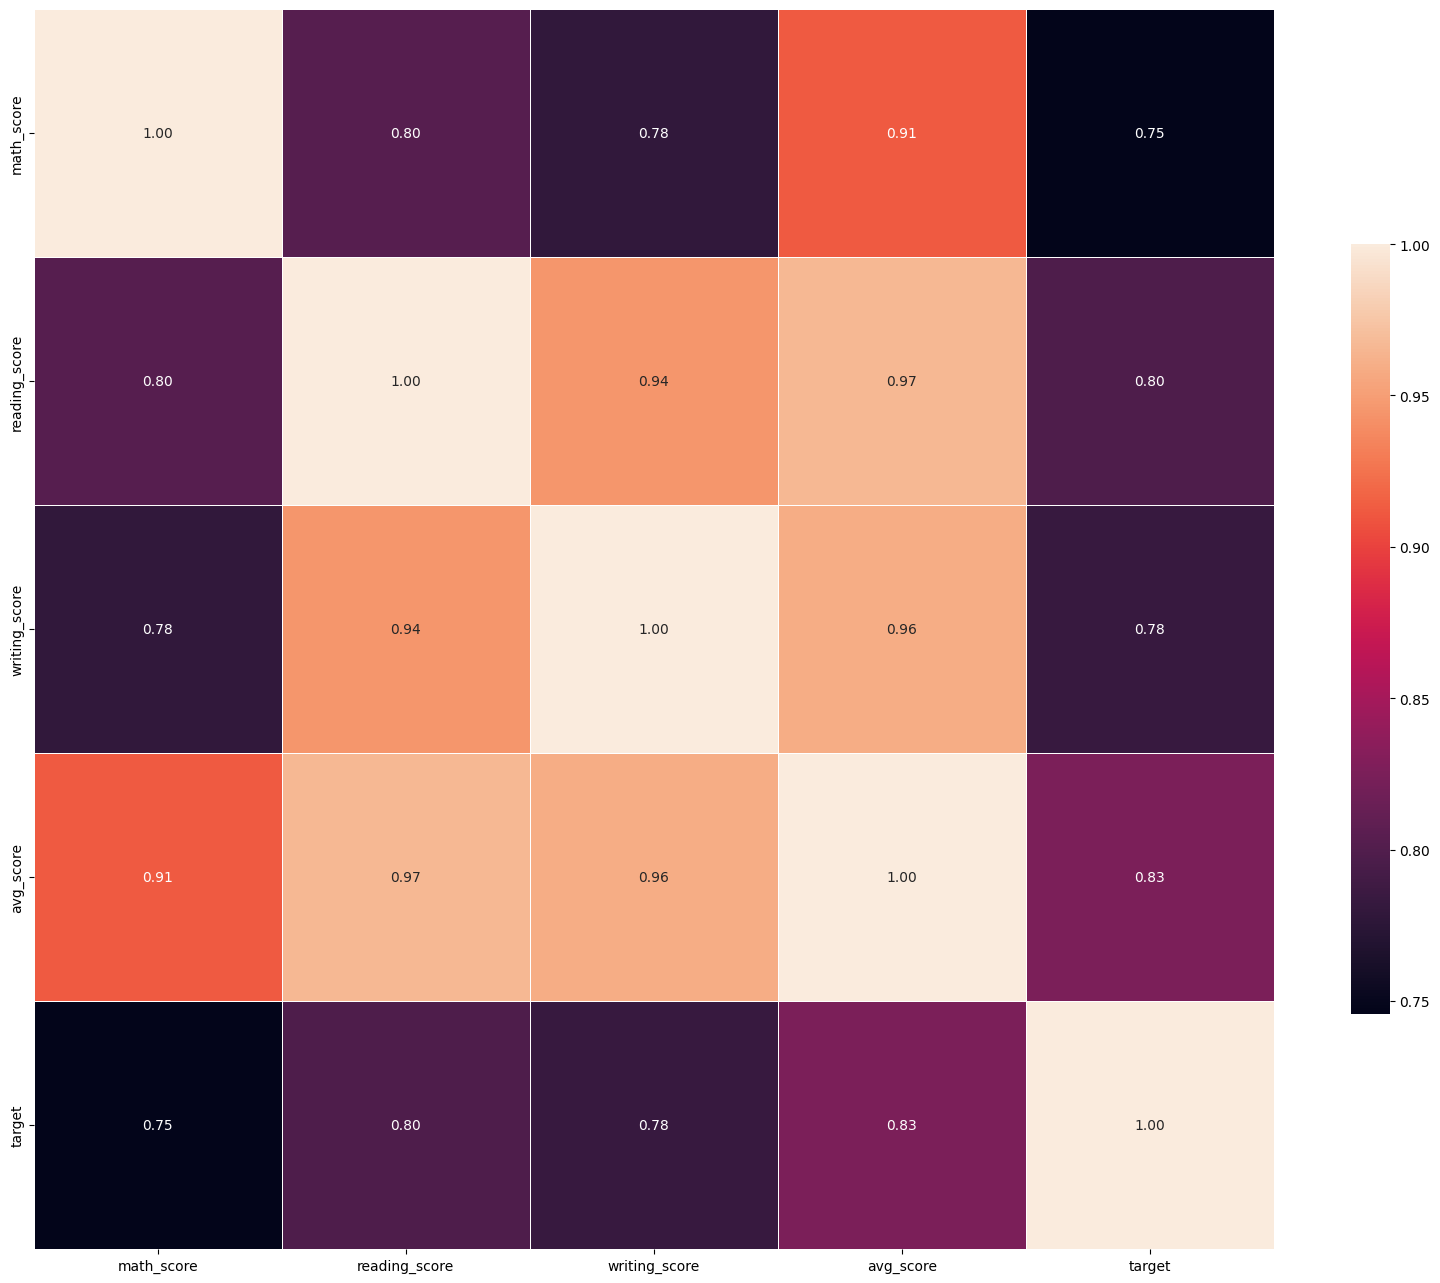

In [ ]:
#mas correlaciones.
corr = exams.corr("spearman")
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# MODELACION 


##Regresión Logistica 

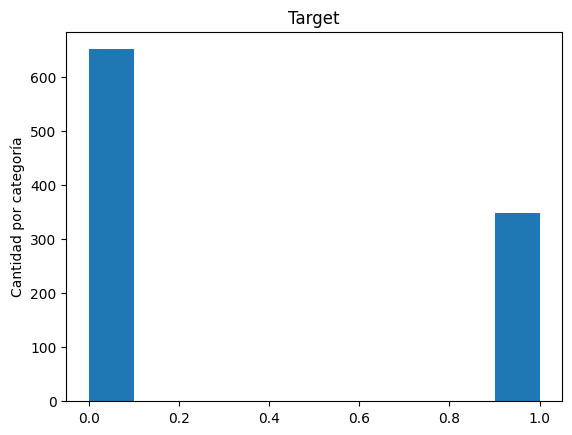

In [ ]:
# Creating histograma de la escolaridad de padre y tutores
fig, ax = plt.subplots(1, 1)
ax.hist(exams["target"])
  
# Set title
ax.set_title("Target")
  
# adding labels
ax.set_ylabel('Cantidad por categoría')
# Show plot
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn import tree
from sklearn import svm

In [ ]:
regressionTable = exams_Dummies
regressionTable.drop(["target", "math_score", "reading_score", "writing_score", "avg_score"], inplace = True, axis = 1)
regressionTable

,gender_female,gender_male,ethnicity_group A,ethnicity_group B,ethnicity_group C,ethnicity_group D,ethnicity_group E,parent_level_associate's degree,parent_level_bachelor's degree,parent_level_high school,parent_level_master's degree,parent_level_some college,parent_level_some high school,lunch_free/reduced,lunch_standard,test_preparation_completed,test_preparation_none
0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0
1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1
2,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1
3,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
4,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
996,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
997,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0
998,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1


In [ ]:
X = regressionTable
y = exams["target"]

In [ ]:
steps1 = [ ("Scaler", StandardScaler()) ,("Logreg", LogisticRegression(max_iter = 300000))] #modelo1
steps2 = [ ("Scaler", StandardScaler()) ,("Tree", tree.DecisionTreeClassifier())] #modelo2
steps3 = [ ("Scaler", StandardScaler()) ,("SVMCLF", svm.LinearSVC(max_iter = 300000))] #modelo3

In [ ]:
from sklearn import metrics
#Regresion Logistica
pipeline1 = Pipeline(steps1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state= 12)

pipeline1.fit(X_train, y_train)

y_pred = pipeline1.predict(X_test)
#evaluacion de matriz de confusion:
print(confusion_matrix(y_test, y_pred), "\n", "Correlacion de matthew: " , matthews_corrcoef(y_test, y_pred))
print("\nPrecisión: ", metrics.precision_score(y_test, y_pred))
print("\nROC: ", metrics.roc_auc_score(y_test, y_pred))


[[224  33]
 [ 90  53]] 
 Correlacion de matthew:  0.2825783987824388

Precisión:  0.6162790697674418

ROC:  0.6211123506843351


In [ ]:
#arbol de decision
pipeline2 = Pipeline(steps2)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state= 12)

pipeline2.fit(X_train, y_train)

y_pred = pipeline2.predict(X_test)

print(confusion_matrix(y_test, y_pred), "\n", "Correlacion de matthew: " , matthews_corrcoef(y_test, y_pred))
print("\nROC: ", metrics.roc_auc_score(y_test, y_pred))

[[195  62]
 [ 95  48]] 
 Correlacion de matthew:  0.10134435263747776

ROC:  0.5472095997387827


In [ ]:
#SUPPORT VECTOR MACHINE
pipeline3 = Pipeline(steps3)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state=12)

pipeline3.fit(X_train, y_train)

y_pred = pipeline3.predict(X_test)
print(confusion_matrix(y_test, y_pred), "\n", "Correlacion de matthew: " , matthews_corrcoef(y_test, y_pred))
print("\nROC: ", metrics.roc_auc_score(y_test, y_pred))

[[227  30]
 [ 91  52]] 
 Correlacion de matthew:  0.29311882316088406

ROC:  0.623452423063318


##Validación

In [ ]:
#VALIDACIÓN, USAREMOS SOLO LA REGRESIÓN LOGISTICA

A = exams_Dummies.loc[(exams_Dummies["test_preparation_completed"] == 1) 
 & ((exams_Dummies['parent_level_some high school'] == 0) | (exams_Dummies['parent_level_high school'] == 0)) & (exams_Dummies["ethnicity_group E"] == 1)]
A_test = A["target"]
A

,math_score,reading_score,writing_score,avg_score,target,gender_female,gender_male,ethnicity_group A,ethnicity_group B,ethnicity_group C,...,parent_level_associate's degree,parent_level_bachelor's degree,parent_level_high school,parent_level_master's degree,parent_level_some college,parent_level_some high school,lunch_free/reduced,lunch_standard,test_preparation_completed,test_preparation_none
50,65,77,74,72.00,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
51,74,83,84,80.33,1,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
57,89,93,93,91.67,1,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
74,61,49,52,54.00,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0
199,89,94,94,92.33,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
211,46,57,57,53.33,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
221,59,68,68,65.00,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
285,80,70,71,73.67,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,1,0
304,76,61,61,66.00,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
362,83,80,82,81.67,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0


In [ ]:
reg = A
reg.drop(["target", "math_score", "reading_score", "writing_score", "avg_score"], inplace = True, axis = 1)

<ipython-input-64-58930190cb4c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg.drop(["target", "math_score", "reading_score", "writing_score", "avg_score"], inplace = True, axis = 1)


In [ ]:
reg

,gender_female,gender_male,ethnicity_group A,ethnicity_group B,ethnicity_group C,ethnicity_group D,ethnicity_group E,parent_level_associate's degree,parent_level_bachelor's degree,parent_level_high school,parent_level_master's degree,parent_level_some college,parent_level_some high school,lunch_free/reduced,lunch_standard,test_preparation_completed,test_preparation_none
50,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0
51,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0
57,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0
74,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0
199,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0
211,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0
221,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0
285,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0
304,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0
362,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0


In [ ]:
A_pred = pipeline1.predict(reg)
print(confusion_matrix(A_test, A_pred), matthews_corrcoef(A_test, A_pred))

[[10  4]
 [ 2 33]] 0.6903452589658139
